In [19]:
import pandas as pd
import torch
from train import load_checkpoint
import data_process as dp
torch.__version__
device = "cpu"

In [2]:
model, _ = load_checkpoint("./")

In [3]:
model

GPT(
  (token_embedding_table): Embedding(20, 128)
  (position_embedding_table): Embedding(128, 128)
  (blocks): Sequential(
    (0): Block(
      (ln_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): CausalSelfAttention(
        (c_attn): Linear(in_features=128, out_features=384, bias=True)
        (c_proj): Linear(in_features=128, out_features=128, bias=True)
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=128, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=128, bias=True)
        (3): Dropout(p=0.1, inplace=False)
      )
    )
    (1): Block(
      (ln_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): CausalSelfAttention(
        (c_attn): Linear(in_features=128, out_features=384, bias=True)
     

In [5]:
df = pd.read_parquet("./datasets/pdb-no-model-no-asm.parquet")

In [6]:
df

,name,3Di,AA
0,pdb101m.ent.gz,DADDVVLLVLQVVLVVVCVVPQLVLLLQLVLQLCVVPVVVLVLDPV...,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
1,pdb102l.ent.gz,DALVVLLCVVQPAAFFFDQDLVGFTAHGRGHGQDPDPDDVPRRQVS...,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
2,pdb102m.ent.gz,DADDVVLLCLQVVLVVVCVVPQLVLLLQLVLLLCVVPVVVLVLPPV...,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
3,pdb103l.ent.gz,DALLVLQCVVFPAAFFWDQDLVGFTDHGRRRGQDPPVSSQVSVCVL...,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTSLDAAKSELDKA...
4,pdb103m.ent.gz,DADDVVLLVLQVVLVVVCVVPQLVLLLQLVLLLCVVPVVVQVLDPP...,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
...,...,...,...
199493,pdb9rsa.ent.gz_A,DADLQRVCCLFAEDQPDQAQDDQCSCLVSCVVSPVLVPHQNFKGKH...,KETAAAKFERQHMDSSTSAASSSNYCNQMMKSRNLTKDRCKPVNTF...
199494,pdb9rub.ent.gz_A,DFLPLQEDQPCDVVVVVPPAQWKKWKKQWDWDPPDDPSGVLSVLQL...,DQSSRYVNLALKEEDLIAGGEHVLCAYIMKPKAGYGYVATAAHFAA...
199495,pdb9wga.ent.gz_A,DFADPVVVNDADPQQFWQALVRDGDDDCRGQNPRTGAGNRPFFDFA...,ERCGEQGSNMECPNNLCCSQYGYCGMGGDYCGKGCQNGACWTSKRC...
199496,pdb9xia.ent.gz,DDDAAALQVQAEEELCALQPQFADPPDDGLADGDQLLVVLVLCLVR...,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...


In [7]:
small_df = df.sample(10_000)
small_df

,name,3Di,AA
106891,pdb4zyp.ent.gz_A,DQWEKEAEQQALKMKIFRAWEWELPDKAKAKEKEFFADDDDDPDPA...,QNITEEFYQSTCSAVSKGYLSALRTGWYTSVITIELSNIKENKCNG...
88841,pdb4hor.ent.gz_A,DPVVVVVVLVVLLCVADAPVNLPQDPLLWDLLLLLVVLVVCVVFVV...,MSEIRKDTLKAILLELECHFTWNLLKEDIDLFEVEDTIGQQLEFLT...
111691,pdb5eku.ent.gz_A,DDPQAPCVVPDPPDDDDPVRGRDGVVLVCVCVQAVVLVVLLVLNVV...,RPPDAFVNRIDRNIPVPARLRHTPVSLIEAVNDFHYAMMNDEERNN...
162216,pdb6xxq.ent.gz_A,DAVVLVVQVVVLCCVQCPQQWAFKKWDDCVWPNDDFPQRATGMETE...,NTYEQINKVKKILRKHLKNNLIGTYMFGSGVESGLKPNSDLDFLVV...
198884,pdb8tn9.ent.gz,DEAAEWEKEWDKDFDALALDPDDDDDDDGDPDTIFIAMETADPPRD...,AQLRQFYVAAQGISWSYRPEPTNSSLNLSVTSFKKIVYREYEPYFK...
...,...,...,...
137789,pdb6btj.ent.gz_A,DAWAKDAAAEAEAQAKDKIKIADALVQLQPWKKWKWWAAVVGDIDT...,VQLVQSGAEVKKPGASVKVSCKASGYTLTRYYFHWVRQAPGQGFEW...
166090,pdb7bq5.ent.gz_A,DPPQFQPAEAEWEADPVGWWTKDKAWASYKYFYYYDQFLGKIKHQH...,IRCIGVSNRDFVEGMSGGTWVDVVLEHGGCVTVMAQDKPTVDIELV...
29671,pdb2bou.ent.gz,DAFDPLAEPQWGGPHNFWIAGHAQWDWPDRIDGDSPTDTHGDFPQV...,RGCARWCPQDSSCVNATACRCNPGFSSFSEIITTPMETCDDINECA...
29639,pdb2bnq.ent.gz_A,DKKKKKKKWKWKQDQVDPAIWIKMWIDIQPHTFWIATVVDDPLWID...,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...


In [8]:
import umap

mapper = umap.UMAP()

/usr/local/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

In [14]:
def to_embedding(df):
    with torch.no_grad():
        res = []
        for repr, name in zip(df["3Di"], df["name"]):
            seq = torch.tensor([dp.encode(repr)], dtype=torch.long, device=device)
            embeddings = model.seq_embeddings(seq).detach().cpu()
            if len(embeddings.shape) > 1:
                embeddings = embeddings.mean(0)
            res.append(embeddings)
        return torch.stack(res)
res = to_embedding(small_df)

In [17]:
res.shape

torch.Size([10000, 128])

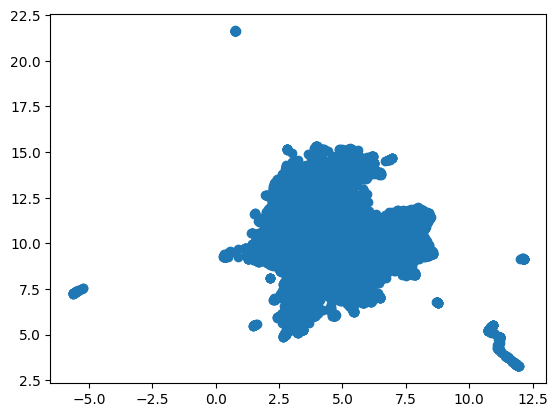

In [18]:
import matplotlib.pyplot as plt

embed2D = mapper.fit_transform(res)
plt.scatter(embed2D[:, 0], embed2D[:, 1])